# Background Note 

# Probability: Bernoulli and Binomial Random Variables

# By Albert S. Kyle

$\def \sm {} \renewcommand{\sm}{ {\scriptstyle{\text{*}}}}$ 
$\def \mm {} \renewcommand{\mm}{{\scriptsize @}}$
$\def \E {} \renewcommand{\E}{\mathrm{E}}$
$\def \e {} \renewcommand{\e}{\mathrm{e}}$
$\def \drm {} \renewcommand{\drm}{\mathrm{\, d}}$
$\def \var {} \renewcommand{\var}{\mathrm{var}}$
$\def \cov {} \renewcommand{\cov}{\mathrm{cov}}$
$\def \corr {} \renewcommand{\corr}{\mathrm{corr}}$
$\def \stdev {} \renewcommand{\stdev}{\mathrm{stdev}}$
$\def \t {} \renewcommand{\t}{^{\mathsf{T}}}$
$\def \comma {} \renewcommand{\comma}{\, , \,}$
$\def \vec {} \renewcommand{\vec}[1]{\mathbf{#1}}$
$\def \skew {} \renewcommand{\skew}{\mathrm{skew}}$
$\def \kurt {} \renewcommand{\kurt}{\mathrm{kurt}}$
$\def \prob {} \renewcommand{\prob}{\textrm{prob}}$
$\def \midx {} \renewcommand{\midx}{\, \mid \,}$


In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import sys
import datetime
import timeit

print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('NumPy version ' + np.__version__)
print('SciPy version ' + scipy.__version__)
print('matplotlib version ' + matplotlib.__version__)

timestamp = datetime.datetime.now().strftime('%Y-%m%d-%H%M')
print("Timestamp:", timestamp)
tstart = timeit.default_timer()


Python version 3.12.8 | packaged by conda-forge | (main, Dec  5 2024, 14:06:27) [MSC v.1942 64 bit (AMD64)]
Pandas version 2.2.3
NumPy version 1.26.4
SciPy version 1.15.1
matplotlib version 3.10.0
Timestamp: 2025-0902-1626


##### Conventions

These notes define the function `f()` so that its definition changes from cell to cell.  By using local variables to make the examplesself-contained, this approach avoids name clashes, except for the name of the function `f()` itself. 

### Importance of Probability and Statistics in Finance

The prices of financial assets fluctuate in value.  These fluctuations can be modeled as outcomes of **random variables**. Understanding the randomness of financial returns requires knowledge of **probability** and **statistics**. This note reviews some fundamental concepts of probability. 

The philosophical, scientific, and mathematical foundations of probability theory are more complicated than the simple intuition of tossing a coin would suggest. Is anything in life random? Or is everything in life random?


### Probability mass function for a random variable with two outcomes

Think of tossing a coin as generating a random variable with two outcomes. If the outcome is tails, I obtain the numerical value $0$ (failure) with probability $1-p$.  If the outcome is heads, I obtain the numerical value $1$ (success) with probability $p$.  If the coin is fair, then $p = 1-p = 1/2$. The coin toss is a **random variable** which we will call $X$.

We can associate with the random variable $X$ a **probability mass function** $f(x; p)$, which maps each outcome ($X=0$ or $X=1$) into its associated probability ($1-p$ or $p$):

\begin{equation}
f(x; p) = \left\{ 
\begin{array}{ll}
1-p & \text{if } x = 0\\
p & \text{if } x = 1
\end{array} \right. .
\end{equation}

Here the semicolon in the notation $f(x; p)$ allows us to think of $f(x)$ as probability mass function of one outcome variable $x$, with $p$ after the semicolon reminding us that the probability mass function depends on a single "fixed" parameter $p$.

The probability mass function $f(x; p)$ completely describes the **probability distribution** associated with the random variable $X$.

By convention, a capital letter ($X$) is used to denote the random variable itself, while the lower case letter  ($x$) is used to denote an outcome.

Obviously, the probability of succes $p$ must satisfy the conditions $0 \le p \le 1$. Of course, this implies that the probability of failure $1-p$ satisfies the analogous inequalities $0 \le 1-p \le 1$.

This particular distribution (two outcomes of 0 or 1) is called a **Bernoulli distribution**.

### Continuous and discrete random variables

The concept of a random variable generalizes in the obvious way for more than two outcomes. Most random variables are classified as **discrete** or **continuous**. Discrete random variables have a finite or **countably infinite** number of outcomes. They include the **Bernoulli**, **multinomial**, **binomial**, and **Poisson** distributions. Continuous random variables have have an **uncountably infinite** number of outcomes. They include the **normal**, **lognormal**, **exponential**, **gamma**, **beta**, **Pareto**, and **Cauchy** distributions. 

Every discrete distribution is described by a **probability mass function** (**pmf**). For example, the **Poisson distribution**, described by one parameter $\lambda > 0$, has a countabilty infinite number of outcomes, nonnegative integers, with pmf

\begin{equation}
f(n) =  \frac{\e^{-\lambda} \sm \lambda^n}{n!}, \qquad \text{for  } n=0,1,2,\ldots .
\end{equation}

Obviously, we must have $\sum_{n=0}^\infty f(n) = 1$ (Why?) This is achieved by choosing the specific factor $\e^{-\lambda}$ in the pmf above.

If a continuous distribution is well-behaved enough, it is described by a **probability density function** (**pdf**). The **standard normal distribution** with mean 0 and variance 1 has probability density function

\begin{equation}
f(z) =  \frac{1}{\sqrt{2 \sm \pi}} \sm \e^{-z^2 / 2}, \qquad \text{for  } z \in \mathcal{R} .
\end{equation}

The intuitive interpretation of a pdf is $\text{prob}[x \le X \le x + \Delta t] \approx f(x) \sm \Delta t$. Obviously, we must have $\int_{z=-\infty}^{+\infty} f(z) \drm z = 1$. (Why?) The factor $\frac{1}{\sqrt{2 \pi}}$ makes the probabilities integrate to one, as required for a pdf.

All of these distributions have applications in finance. The most important ones are **lognormal**, **normal**, **binomial**, **exponential**, and **Poisson**.

### Events

Mathematicians distinguish between **events** (the possible outcomes of the coin toss) and the value associated events (0 or 1). Mathematicians use the upper case Greek letter omega to denote the **sample space**, define probabilities (**measures**) on subsets (**$\pmb{\sigma}$-algebra**) on $\Omega$.  

For the coin toss, we have $\Omega = \{ \text{heads}, \text{tails} \}$ and use the lower case Greek letter omega to denote a particular outcome (event) such as $\{ \text{heads} \} \subset \Omega$.

In finance, the events can be thought of as earnings announcements, news articles, bankruptcy announcements, or order arrivals to trade assets. The outcomes are typically asset prices but may also be earnings numbers or macroeconomic statistics (inflation, GDP growth, retail sales).

#### Cumulative distribution function

The probability distribution of any random variable is described by a **cumulative distribution function** (**cdf**) $F(x)$, which is defined by

\begin{equation}
F(x) = \text{Prob}(X \le x) \qquad \text{ for any } x \in \mathcal{R}.
\end{equation}

For the Bernoulli distribution, the cdf is explicitly given by

\begin{equation}
F(x) = \left\{ 
\begin{array}{ll}
0 & \text{if } x < 0\\
1-p & \text{if } 0 \le x < 1\\
1 & \text{if } 1 \le x
\end{array} \right. .
\end{equation}

For the normal distribution, the cdf is defined by an integral

\begin{equation}
F(z) = \int_{-\infty}^z \frac{1}{\sqrt{2 \pi}} \sm \e^{-z^2/2} \drm z.
\end{equation}

This integral does not have a closed-form solution.

Obvously, any cdf $F(x)$ is **weakly monotonically increasing** and satisfies $0 \le F(x) \le 1$, with $\lim_{x \rightarrow -\infty} F(x) = 0$ and $\lim_{x \rightarrow +\infty} F(x) = 1$. 



### Expected Value
 
Now suppose that I flip a coin $N$ times, obtaining $N$ outcomes of $0$ or $1$. Assume the outcomes are **independently distributed**. This means that the probability distribution for the $n\!$ th outcome cannot be predicted based on the other $N-1$ outcomes. Regardless of whether the first $N-1$ outcomes are all $0$, all $1$, or any sequence of $0\!$ s and $1\!$ s, my best estimate of the probabilities of heads and tails on the $N\!$ th coin toss are $p$ and $1-p$.

The **expected value** of any random variable $X$ (also called **expectation** or **mean**), written $\E[X]$ and often denoted with the lower case Greek letter mu, can be informally defined as the average value obtained from $N$ independently distributed coin tosses in the limit as $N \rightarrow \infty$. 

Mathematically, the expectation of a discrete random variable can be defined as a probability-weighted sum

$$
\E [ X ] = \sum_{n} x(n) \sm f(n),
$$

where $x(n)$ denotes the value associated with outcome $n$.

For the Bernoulli distribution, the expected value is given by

\begin{equation}
\mu = \E [X] = 0 \sm (1-p) + 1 \sm p =p .
\end{equation}

For the Poisson random variable, the expectation is

\begin{equation}
\E [ X ] = \sum_{n=0}^{\infty} \; n \sm \frac{\e^{-\lambda} \sm \lambda^n}{n!} = \lambda .
\end{equation}

(Both the convergence of the above infinite sum to $\lambda$ can be proved from the definition of the exponential function $\e^x$.)


Some random variables do not have finite expectations. (Example: Consider a random variable with payoffs $2^n$ with probability $1 / 2^n$, for $n = 1,2, \dots $.)

### Law of Large Numbers

The **law of large numbers** says that the empirical **frequencies** of each outcome of a discrete random variable, such as $0$ and $1$ for the Bernoulli example, converge to the true probabilities $p$, $1-p$ in the limit as $N \rightarrow \infty$. Defining this limit in a mathematically precise manner requires making a distinction between the **strong law of large numbers** and the **weak law of large numbers**, which we will not discuss further here.

For a continuous random variable, the expectations is

\begin{equation}
\E [ X ] = \int_{z=-\infty}^{+\infty} \: z \sm f(z) \sm \drm z .
\end{equation}



### Linearity of Expectations


The **expectation operator** $\E[\ldots]$ has a useful linearity property.  If $X_0$ and $X_1$ are two random variables with $\E[X_0] = \mu_0$ and $\E[X_1] = \mu_1$, then for any constants $a$ and $b$, the random variable $a \sm X_0 + b \sm X_1$ has expectation given by

\begin{equation}
\E[a \sm X_0 + b \sm X_1] = a \sm \mu_0 + b \sm \mu_1 .
\end{equation}

For example, if $X_0$ is a trivial Bernoulli random variable whose outcome is always 1 and $X_1$ is a Bernoulli random variable (with outcomes 0 and 1), $a \sm X_0 + (b-a) \sm X_1$ is a random variable with two outcomes: $a$ with probability $1-p$ and $b$ with probability $p$.



### Random Number Generator

A **random number generator** is an algorithm which generates a sequence of numbers which is difficult to predict. Numpy and Scipy have random number generators which generate **pseudo-random numbers** from a nonrandom algorithm and an initial **seed**. Although the outcomes are **deterministic** (i.e., completely nonrandom) if the algorithm and initial seed are known, the outcomes appear to be random if the initial seed is unknown and hard to guess. What it means to "appear to be random" is infinitely complicated and the subject of a great deal of research (related, for example, to code-breaking).

In finance, **stochastic simulation** based on **Monte Carlo** techniques is often used to price assets, test code, and test trading strategies. Random number generators can be used to simulate stock prices and statistics related to securities returns.

### Random Number Generation in Numpy and Scipy

Here is code to generate a sequence on $N$ independently distributed random integers, which are $a$ or $b$ with probabilities $q=1-p$ and $p$. 

By choosing $N$ to be one million, we can illustrate the intuition for expected value and the law of large numbers.

In [2]:
def f():
    N = 10**6
    a = -1
    b = +1
    p = 0.50

    q = 1 - p
    xbar = (q * a + p * b)

    rng = np.random.default_rng(seed=12345)

    t0 = timeit.default_timer()
    x = rng.choice([a, b], size=N, p=[q, p])
    #x = rng.binomial(n=1, p=p, size=N)
    dt = timeit.default_timer() - t0
    print(f"Time to generate {N=} random numbers: {dt=} seconds\n")

    xunique, xcounts = np.unique(x, return_counts=True)
    df = pd.DataFrame({'x' : xunique, 'count' : xcounts, 'freq' : xcounts / N, 'prob' : [p,q]})

    #print(x)

    print("Expectation: Sample mean should be close to theoretical mean:")
    print(f"Theoretical expected value: {xbar=}")
    print(f"Sample mean:  {x.mean()=}")

    print("\nLaw of Large Numbers: Sample frequencies should be close to theoretical probabilities:")
    print(f"Frequencies for {N=}:")
    display(df)
    return None
    
f()    

Time to generate N=1000000 random numbers: dt=0.010616699932143092 seconds

Expectation: Sample mean should be close to theoretical mean:
Theoretical expected value: xbar=0.0
Sample mean:  x.mean()=-0.00034

Law of Large Numbers: Sample frequencies should be close to theoretical probabilities:
Frequencies for N=1000000:


,x,count,freq,prob
0,-1,500170,0.50017,0.5
1,1,499830,0.49983,0.5


#### Multiple ways to generate random variables with two outcomes:

Using Numpy and Scipy, there are multiple ways to generate random sequences of numbers with two outcomes. Assuming $p=0.50$ can make the random number generation faster.

Note that if the random variable $X$ has outcomes $0$ and $1$, the outcomes can be changed to $a$ and $b$ with the transformation $Y = (b - a) \sm X + a$.

The next cell illustrates use of `%timeit` to time code which generates random numbers various ways. The cell uses global variables because `%timeit` looks for global variables.



In [3]:

N = 10**6
a = -1
b = +1
p = 0.50
q = 1 - p
rng = np.random.default_rng()

x = rng.choice([a, b], size=N, p=[q, p])
print(f"{x=}, {x.dtype=}, {x.size=}")
x = rng.binomial(n=1, p=p, size=N) * (b - a) + a
print(f"{x=}, {x.size=}")
x = scipy.stats.bernoulli.rvs(p=p, size=N) * (b - a) + a
print(f"{x=}, {x.size=}")
x = rng.integers(low=0, high=1, size=N, dtype=np.int64, endpoint=True) * (b - a) + a
print(f"{x=}, {x.size=}\n")

%timeit -n 5 -r 3 x = rng.choice([a, b], size=N, p=[q, p])
%timeit -n 5 -r 3 x = rng.binomial(n=1, p=p, size=N) * (b - a) + a
%timeit -n 5 -r 3 x = scipy.stats.bernoulli.rvs(p=p, size=N) * (b - a) + a
# rng.integers is faster but requires p = 0.50 exactly!
%timeit -n 5 -r 3 x = rng.integers(low=0, high=1, size=N, dtype=np.int64, endpoint=True) * (b - a) + a

del N, a, b, p, q, rng, x

x=array([ 1,  1,  1, ..., -1,  1,  1]), x.dtype=dtype('int32'), x.size=1000000
x=array([ 1,  1, -1, ...,  1,  1,  1], dtype=int64), x.size=1000000
x=array([-1,  1,  1, ...,  1, -1, -1], dtype=int64), x.size=1000000
x=array([-1, -1,  1, ..., -1,  1,  1], dtype=int64), x.size=1000000

10 ms ± 28.2 μs per loop (mean ± std. dev. of 3 runs, 5 loops each)
12.8 ms ± 229 μs per loop (mean ± std. dev. of 3 runs, 5 loops each)
17.1 ms ± 144 μs per loop (mean ± std. dev. of 3 runs, 5 loops each)
5.33 ms ± 122 μs per loop (mean ± std. dev. of 3 runs, 5 loops each)


### Exercise 1 (Easy)

1. Describe the probability mass function for the six outcomes of rolling an unbiased die. (This is an example of a **multinomial** distribution.)

2. Simulate rolling a die one million times. Construct a Pandas dataframe to show the empirical frequencies and theoretical probabilities of the outcomes.

3. (optional) Defining `rng = np.random.default_rng()`, is it fastest to use `rng.choice(...)`, `rng.integers(...)`, or `scipy.stats.multinomial.rvs(...)` to simulate rolling an unbiased die many times? (Why?)

### Variance and standard deviation

The **variance** $\sigma^2$ and **standard deviation** $\sigma$ of random variables are measures of dispersion.  For any random variable $X$, the variance and standard deviation are defined as

\begin{equation}
\sigma^2 = \var[X] := \E \big[ (X - \E[X])^2 \big],
\qquad
\sigma = \stdev[X] = \sqrt{\var[X]}.
\end{equation}

The quantity $\mu_2 := \E [ X^2 ]$ is called the **second moment**. More generally, the **first moment** (mean), **second moment**, **third moment**, **fourth moment**, etc.s are defined by $\mu_n := \E [ X^n ]$, $n=1$, $2$, $3$, $4$, $\ldots$.

The variance is related to the second moment by

\begin{equation}
\var [ X ] = \mu_2 - \mu_1^2, \qquad \text{or} \qquad \E \big[ (X - \E[X])^2 \big] = E [ X^2 ] - \left( \E [ X ] \right)^2.
\end{equation}

For the specific two-outcome random variable $X$, which has outcomes $a$, $b$ with probabilities $1-p$, $p$, with mean $\mu = (1-p) \sm a + p \sm b$, it can be shown that

\begin{equation}
\sigma^2 = (1-p) \sm (a - \mu)^2 + p \sm (b - \mu)^2,
\qquad
\sigma = \sqrt{(1-p) \sm (a - \mu)^2 + p \sm (b - \mu)^2}.
\end{equation}

Note that the units for standard deviation are the same as the units for $X$ itself, but the units for variance are the squares of the units for $X$.

If $X_1$, $\ldots$, $X_N$ are a $N$ independently distributed random variables with variances $\sigma^2_1$, $\ldots$, $\sigma^2_N$, then the variance of their sum is the sum of their variances:

\begin{equation}
\var[X + Y] := \var[X] + \var[Y] \qquad \text{if } X \text{ and } Y \text{ are independently distributed}.
\end{equation}

This fact turns out to be very important in finance! Note that the standard deviation of the sum is not equal to the sum of the standard deviations. (Why?)

If $a$ is a constant then

\begin{equation}
\var[a \sm X] = a^2 \sm \var[X], 
\qquad \text{so } \stdev[a \sm X] = a \sm \stdev[X].
\end{equation}

### Exercise 2 (easy with correct intuition, medium otherwise)

1. Without doing any complicated math, write down the values of $a$ and $b$ (with $a < b$) for a two-outcome random variable with $\mu = 100$ and $\sigma = 5$, assuming that the probabilities of both outcomes are the same. (Note: You can solve this mathematically, but it is easier and more intuitive to "guess" the solution based on understanding what mean and standard deviation mean for this example.)

### Binomial Distribution

A **binomial distribution** $Y$ is defined the sum of $N$ independent draws $X_1$, $\ldots$, $X_N$ from a Bernoulli distribution:

\begin{equation}
Y = \sum_{n=1}^N X_n .
\end{equation}

The linearity properties of the mean and variance imply (Why?)

\begin{equation}
\E[Y] = N \sm p, \qquad \var[Y] = N \sm (1-p) \sm p .
\end{equation}

The outcomes (number of successes with $N$ attempts) with nonzero probabilities are obviously $0$, $1$, $\ldots$, $N$.

For $N=2$, the probability mass function is

\begin{equation}
f_X(x) = \left\{ 
\begin{array}{ll}
1 \sm (1-p)^2 & \text{if } x = 0\\
2 \sm (1-p) \sm p & \text{if } x = 1\\
1 \sm p^2 & \text{if } x = 2
\end{array} \right. .
\end{equation}

The **binomial coefficients** $1,2,1$ multiplying the probability factors $p$ and $q=1-p$ are same as the integer coefficients in the expansion $(q+p)^2 = 1 \sm q^2 + 2 \sm q \sm p + 1 \sm p^2$.

Similarly, for $N=3$, the factors 1,3,3,1 in the probability mass function

\begin{equation}
f_X(x) = \left\{ 
\begin{array}{ll}
1 \sm q^3 & \text{if } x = 0\\
3 \sm q^2 p  & \text{if } x = 1\\
3 \sm q \sm p^2 & \text{if } x = 2\\
1 \sm p^3 & \text{if } x = 3
\end{array} \right. .
\end{equation}

mimic the expansion

\begin{equation}
(q+p)^3 = 1 \sm q^3 + 3 \sm q^2 \sm p + 3 \sm q \sm p^2 + 1 \sm q^3
\end{equation}

This pattern generalizes to arbitrary positive integer $N$.

The probability mass function for $n=0,\ldots,N$ successes for $N$ trials is

\begin{equation}
f_Y(n) = \left( \begin{array}{ll} N \\ n \end{array} \right) q^{N-n} \sm p^{N},
\qquad \text{where} \qquad
\left( \begin{array}{ll} N \\ n \end{array} \right) := \frac{N!}{n! \sm (N-n)!}.
\end{equation}

### Binomial coefficients

The binomial coefficients for $N+1$ can be obtained by shifting the coefficients for $N$ and adding them back to the same coefficients for $N$: 

The sums of binomial coefficients across outcomes are powers of 2:

The binomial probabilities can be obtained by dividing rows by the row sum:

In [4]:
def f():
    N = 5

    print("Binomial coefficients obtained by shifted addition:")
    c = np.zeros((N+1, N+1), dtype=np.int64)
    c[:,0] = 1
    for n in range(0, N):
        c[n + 1, 1:] = c[n, 1:] +  c[n, :-1]
    print(c)    

    csum = c.sum(axis=1)
    print(f"\nSums of binomial coefficients are powers of 2:\n{csum=}")

    prob = c / csum.reshape(N+1, 1)
    print(f"\nBinomial probabilities for p=0.50: prob =\n {prob}")
    print(f"\nCheck that probabilities add up to one:\n{prob.sum(axis=1)}")
    
f()    

Binomial coefficients obtained by shifted addition:
[[ 1  0  0  0  0  0]
 [ 1  1  0  0  0  0]
 [ 1  2  1  0  0  0]
 [ 1  3  3  1  0  0]
 [ 1  4  6  4  1  0]
 [ 1  5 10 10  5  1]]

Sums of binomial coefficients are powers of 2:
csum=array([ 1,  2,  4,  8, 16, 32], dtype=int64)

Binomial probabilities for p=0.50: prob =
 [[1.      0.      0.      0.      0.      0.     ]
 [0.5     0.5     0.      0.      0.      0.     ]
 [0.25    0.5     0.25    0.      0.      0.     ]
 [0.125   0.375   0.375   0.125   0.      0.     ]
 [0.0625  0.25    0.375   0.25    0.0625  0.     ]
 [0.03125 0.15625 0.3125  0.3125  0.15625 0.03125]]

Check that probabilities add up to one:
[1. 1. 1. 1. 1. 1.]


### Using `scipy.stats`*` to play with binomial random variable

Use `scipy.stats` to define a binomial random variable with `rv = scipy.stats.binom(N, p)`, a  **frozen object** which stores the parameters defining the random variable for future use. Other distributions can be defined in a similar manner.

We can then use `rv` to calculate mean, variance, standard deviation, pmf, cdf, other theoretical information, and simulated outcomes.

In [5]:
def f():

    N = 2 # Number of Bernoulli outcomes of 0 or 1
    p = 0.50 # Probability of outcome = 1

    rv = scipy.stats.binom(N, p) # Define the random variable

    print(f"{rv=}")
    print(f"{rv.mean()=}")
    print(f"{rv.var()=}")
    print(f"{rv.std()=}")
    print(f"{rv.pmf(range(N+1))=}")
    print(f"{rv.cdf(range(N+1))=}")
    print(f"simulated values {rv.rvs(10)=}")
    
f()    

rv=<scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026E6F496930>
rv.mean()=1.0
rv.var()=0.5
rv.std()=0.7071067811865476
rv.pmf(range(N+1))=array([0.25, 0.5 , 0.25])
rv.cdf(range(N+1))=array([0.25, 0.75, 1.  ])
simulated values rv.rvs(10)=array([1, 1, 0, 1, 1, 1, 1, 1, 0, 2], dtype=int64)


### Simulate many outcomes of binomial random variable

Let us simulate many outcomes of a binomial random variable defined by 100 tosses of an unbiased coin, then create a figure comparing the empirical frequencies of the simulated outcomes with the theoretical frequencies.

Since we expect the outcomes will be concentrated near then mean and the probabilities of outcomes close to 0 or 100 are very small, we will plot only those outcome which are $\pm 3$ standard deviations from the mean.

mu=50.0, sigma=5.0, x0=35, x1=66


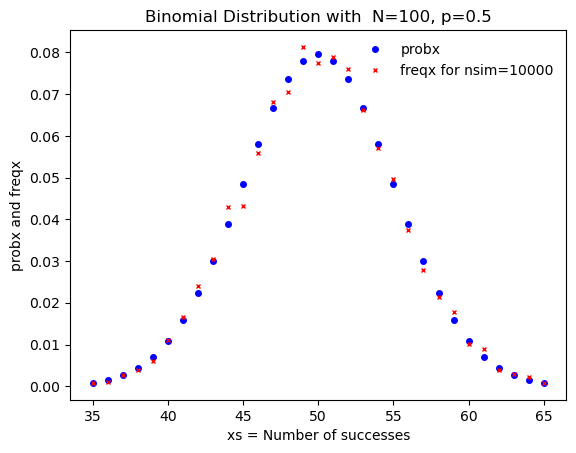

In [6]:
def f():
    N = 100 # Number of Bernoulli outcomes of 0 or 1
    p = 0.50 # Probability of outcome = 1
    nsim = 10000 # Number of binomial random variables to simulate

    # Construct the range of outcomes to be plotted:
    
    rv = scipy.stats.binom(N, p) # Define the random variable
    mu = rv.mean()
    sigma = rv.std()
    nsig = 3.00
    x0 = int(mu - nsig * sigma)
    x1 = int(mu + nsig * sigma) + 1
    xs = np.arange(x0, x1)

    print(f"{mu=}, {sigma=}, {x0=}, {x1=}")

    # Calculate theoretical probabilities:

    probx = rv.pmf(xs)
    
    # Simulate random variables and calculate empirical frequencies:
    
    rvsim = rv.rvs(size=nsim, random_state=1234)  # simulate nsim binomial outcomes
    simval, simcount = np.unique(rvsim, return_counts=True) 
    freqxx = np.zeros(N+1, dtype=np.float64)
    freqxx[simval] = simcount / nsim
    freqx = freqxx[xs]

    # Print debugging information:
    
    #print(f"{rvsim=}")
    #print(f"{simcount=}")
    #print(f"{simval=}")
    #print(f"{freqxx=}")
    #print(f"{freqx=}")
    
    #df = pd.DataFrame({'xs' : xs, 'freqx' : freqx, 'probx' : probx})
    #display(df)

    # Create a figure with appropriate labesl
    
    fig, ax = plt.subplots(1, 1)
    ax.set_title("Binomial Distribution with  N=" + str(N) + ", p=" + str(p))
    ax.set_xlabel("xs = Number of successes")
    ax.set_ylabel("probx and freqx")
    ax.plot(xs, probx, 'bo', ms=4, label='probx')
    ax.plot(xs, freqx, 'rx', ms=3, label='freqx for nsim=' + str(nsim))
    # ax.vlines(ns, 0, freqns, colors='r', lw=1, alpha=0.5)

    ax.legend(loc='best', frameon=False)

    plt.show()
    
f()    

### Exercise 3

The *numpy.random.Generator.binomial* algorithm and the  *scipy.stats.binom.rvs* algorithm simulate binomial outcomes without necessarily adding together simulated outcomes of the individual Bernoulli trials. Presumably, this approach is more efficient.

1. (easy) Simulate 10000 binomial outcomes with $N=100$ and $p=0.50$ as follows: (a) Construct a $1000 \times 100$ matrix of Bernoulli outcomes of 0 or 1. (2) Sum across the 100 columns to obtain a vector of binomial outcomes. Mimic the figure above, replacing the simulated outcomes using `rv.rvs(...)` your simulated outcomes. Color your frequencies green instead of red.

2. (optional) Using `timeit.default_timer()` or `%timeit`, define `rng = np.random.default_rng()` and `rv = scipy.stats.binom(...)`, then compare the efficiency  of (1) inefficiently summing columns of Bernoulli outcomes using `rng.integers(...)`, (2) inefficiently summing columns of Bernoulli outcomes using `rng.choice(...)`, (3) efficiently using `rng.binomial(...)`, and (4) efficiently using `rv.rvs()`.



### Exercise 4

Suppose the price of a stock begins the trading day at 100 dollars per share. The trading day starts at 9:30am and ends at 4:00pm. Every second during the trading day, the price of the stock moves up or down by 1 cent (0.01 dollars, one percent of one percent, or one "basis point") with equal probabilities for up and down moves.

1. (easy) Simulate one day's stock price, and plot the price for each second of the day. (Hint: use the function `np.cumsum()`).

2. (medium) Simulate 5000 days of independendently distributed stock price fluctuations, where the stock price starts each day at 100 dollars. Plot a histogram comparing the empirical end-of-day price frequencies with theoretical probabilities. (Hint: Cut, paste, and edit previous code!)

3. (medium) A typical stock has a standard deviation of price changes equal to about 2 percent each day. Are the results of your simulation for one day empirically realistic?

4. (medium) What "bad" things might happen if the second-by-second simulation had a time frame of 10 years (about 2500 trading days) rather than one trading day?



In [7]:
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
tfinish = timeit.default_timer()
print(f"Finished: {timestamp = }\nExecution time = {tfinish - tstart} seconds")


Finished: timestamp = '2025-09-02 16:26:37'
Execution time = 1.2672180999070406 seconds
